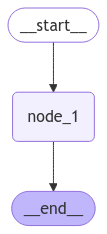

In [1]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    foo: int

def node_1(state):
    print("---Node 1---")
    return {"foo": state['foo'] + 1}

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [3]:
graph.invoke({"foo":1})

---Node 1---


{'foo': 2}

In [4]:
class Ovearall_state(TypedDict):
    foo : int


In [5]:
class Private_state(TypedDict):
    baz : int

In [9]:
def node_1(state : Ovearall_state) :
    print('--node-1--')
    return{ 'baz' : state['foo'] +1}
def node_2(state : Private_state ):
    print('--node-2--')
    return { 'foo' : state['baz'] + 1 }

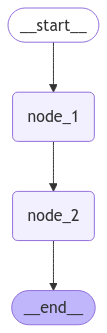

--node-1--
--node-2--


{'foo': 3}

In [10]:
builder = StateGraph(Ovearall_state)
builder.add_node('node_1', node_1)
builder.add_node('node_2', node_2)
builder.add_edge(START, 'node_1')
builder.add_edge('node_1', 'node_2')
builder.add_edge('node_2', END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({'foo':1})


In [11]:
from langchain.chat_models import ChatOllama
from langchain_core.messages import AIMessage ,HumanMessage


In [19]:
message = [AIMessage(content="You said you were researching on ocean mammals")]
message.append(HumanMessage(content= 'Yes you are right '))

In [23]:
from langchain.chat_models import ChatOllama
llm = ChatOllama()
llm.invoke('Where is delhi')

AIMessage(content="\nDelhi is the capital city of India and is located in the northern part of the country. It is situated on the banks of the Yamuna River and is home to a population of over 29 million people, according to the 2011 census. Delhi is known for its rich history, cultural heritage, and vibrant street life. The city is divided into two parts: Old Delhi and New Delhi.\n\nOld Delhi, also known as Old City, is the original walled city of Delhi and is home to many historical sites, including the Red Fort, Jama Masjid, and Chandni Chowk. New Delhi, on the other hand, is a more modern part of the city that was built by the British during their rule in India. It is home to many government buildings, embassies, and diplomatic missions.\n\nDelhi is also known for its cuisine, which reflects the city's diverse cultural heritage. Some popular dishes from Delhi include street food such as chaat, kebabs, and gol gappe, as well as more formal restaurant dishes like tandoori chicken, but

In [24]:
from IPython.display import Image
from langgraph.graph import MessageGraph , MessagesState ,START ,END ,StateGraph
async def cht_node( state: MessagesState):
    return {'message': llm.ainvoke(state['messages'])}

In [25]:
#Building graph 
builder = StateGraph(MessagesState)
builder.add_node('cht_node', cht_node)
builder.add_edge(START, 'cht_node')
builder.add_edge('cht_node', END)
graph = builder.compile()

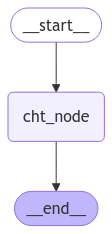

In [26]:
display(Image(graph.get_graph().draw_mermaid_png()))